In [12]:
# 워드클라우드 만들기 위해 한글 폰트 설치
!sudo apt-get install -y fonts-nanum > /dev/null
!sudo fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [19]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from wordcloud import WordCloud

In [2]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
'''from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]'''

Saving 제주핫플레이스.csv to 제주핫플레이스.csv


In [4]:
jeju_df = pd.read_csv('제주핫플레이스.csv')
jeju_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  8369 non-null   object
 1   date     8369 non-null   object
 2   like     8369 non-null   object
 3   place    2845 non-null   object
 4   tags     8369 non-null   object
dtypes: object(5)
memory usage: 327.0+ KB


In [5]:
jeju_df.tail()

,content,date,like,place,tags
8364,Now it's purple😆💜수색 넘 이쀼리 🤭 올해는 아퓨지말구 즐거운 일만 가...,2019-01-01,42,NaN,"['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그..."
8365,.간다간다간다#제주 #친정여행 #겨울방학 #제주여행앞머리는 괜히 전날 잘라서 또순이...,2019-01-01,50,NaN,"['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'..."
8366,2019년 모두 복 많이많이 받고 풍요로운 한해 보내길 ♥️#사진좀찍으시는님덕에건져...,2019-01-01,68,Jeju,"['#사진좀찍으시는님덕에건져또', '#이순간']"
8367,2018.12.25 ⠀룸에 의자가 두개 밖에 없어서 ⠀이현이는 유모차에 앉아서 식사...,2019-01-01,70,NaN,[]
8368,.2019년 첫날디스이즈핫에서 새해를 맞이하시는 손님들께 떡국을 준비했습니다.한 해...,2019-01-01,48,디스이즈핫,['#HappyNewYearEveryone']


In [6]:
len(np.unique(jeju_df.index))

8369

In [7]:
tags = jeju_df.tags[0]
tags

"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"

In [9]:
tags[2:-2]

"#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이"

In [13]:
tags_total = []
for tags in jeju_df.tags:
    tags_total.extend(tags[2:-2].split("', '"))    # tags[2:-2]의 데이터 타입은 str

len(tags_total), tags_total[-10:]

(141245,
 ['#제주',
  '#친정여행',
  '#겨울방학',
  '#제주여행앞머리는',
  '#친정찬스',
  '#엄마가쏜다',
  '#사진좀찍으시는님덕에건져또',
  '#이순간',
  '',
  '#HappyNewYearEveryone'])

### 해시태그 빈도 집계

In [14]:
tag_counts = Counter(tags_total)

In [15]:
print(tag_counts.most_common(50))

[('#제주맛집', 3412), ('#제주도맛집', 3149), ('#제주여행', 3020), ('#제주관광', 2827), ('#제주도', 2053), ('#제주', 1538), ('#제주도여행', 1454), ('#서귀포맛집', 1330), ('#제주도가볼만한곳', 1014), ('#제주핫플레이스', 835), ('#서귀포', 825), ('#jeju', 749), ('#일상', 701), ('#제주흑돼지맛집', 685), ('#제주맛집추천', 675), ('#제주도흑돼지맛집', 669), ('#제주도흑돼지', 663), ('#성산일출봉', 650), ('#제주흑돼지', 648), ('#협재맛집', 602), ('#제주카페', 600), ('#제주도그램', 594), ('#서귀포흑돼지맛집', 593), ('', 587), ('#서귀포흑돼지', 577), ('#제주도민', 570), ('#섭지코지', 556), ('#성산일출봉맛집', 545), ('#섭지코지맛집', 511), ('#선팔', 503), ('#제주가볼만한곳', 497), ('#통갈치구이', 494), ('#제주통갈치구이', 485), ('#제주핫플', 483), ('#제주살이', 480), ('#제주서귀포맛집', 479), ('#제주도민맛집', 477), ('#여행스타그램', 472), ('#제주반영구', 440), ('#제주도관광', 440), ('#여행', 436), ('#제주눈썹문신', 434), ('#서귀포눈썹문신', 420), ('#제주시', 419), ('#제주스타그램', 408), ('#반영구', 405), ('#눈썹문신', 405), ('#중문맛집', 404), ('#제주일상', 398), ('#제주자연눈썹', 397)]


In [16]:
# 데이터 정제하기
stopwords = ['#jeju','#일상','','#제주','#제주도','#선팔','#제주눈썹문신',
             '#서귀포눈썹문신', '#반영구', '#눈썹문신', '#제주자연눈썹',
             '#제주속눈썹', '#서귀포남자눈썹문신', '#서귀포자연눈썹', '#제주남자눈썹문신', 
             '#서귀포속눈썹', '#서귀포반영구']
'''tag_total_refined = []
for tag in tags_total:
    if tag not in stopwords:
        tag_total_refined.append(tag)'''
tags_total = [tag for tag in tags_total if tag not in stopwords]

tag_counts = Counter(tags_total)
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#먹스타그램', 395),
 ('#맞팔', 388),
 ('#카멜리아힐', 379),
 ('#중문흑돼지맛집', 377),
 ('#소통', 374),
 ('#애월맛집', 373),
 ('#daily', 360),
 ('#제주메이크업', 358),
 ('#가족여행', 356),
 ('#제주도여행코스', 350),
 ('#jejuisland', 343)]

In [17]:
! ls -l /usr/share/fonts/truetype/nanum

total 28836
-rw-r--r-- 1 root root 4413912 Dec  3  2017 NanumBarunGothicBold.ttf
-rw-r--r-- 1 root root 4184028 Dec  3  2017 NanumBarunGothic.ttf
-rw-r--r-- 1 root root 4642244 Dec  3  2017 NanumGothicBold.ttf
-rw-r--r-- 1 root root 4691820 Dec  3  2017 NanumGothic.ttf
-rw-r--r-- 1 root root 4183592 Dec  3  2017 NanumMyeongjoBold.ttf
-rw-r--r-- 1 root root 3839464 Dec  3  2017 NanumMyeongjo.ttf
-rw-r--r-- 1 root root  733500 Dec  3  2017 NanumSquareB.ttf
-rw-r--r-- 1 root root 1030948 Dec  3  2017 NanumSquareRoundB.ttf
-rw-r--r-- 1 root root 1063276 Dec  3  2017 NanumSquareRoundR.ttf
-rw-r--r-- 1 root root  723640 Dec  3  2017 NanumSquareR.ttf


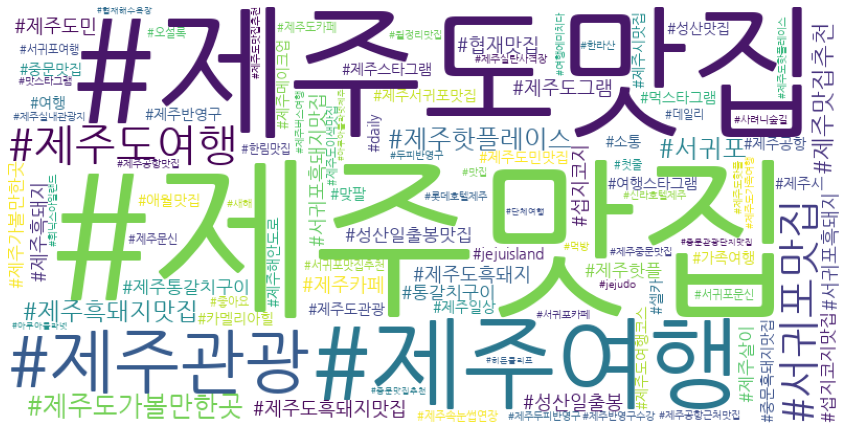

In [21]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=path,
                      background_color='white',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800, height=400
                      ).generate_from_frequencies(tag_counts)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()